In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyecharts
from pyecharts import options as opts
plt.rcParams["font.sans-serif"]=["SimHei"]

In [3]:
data = pd.read_csv('titles.csv')

In [3]:
data.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [4]:
# 处理空值
data_country = data.dropna(subset=['title', 'imdb_votes', 'tmdb_score'])
data_country = data_country[data_country['production_countries'] != '[]']
data_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4943 entries, 1 to 5798
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4943 non-null   object 
 1   title                 4943 non-null   object 
 2   type                  4943 non-null   object 
 3   description           4941 non-null   object 
 4   release_year          4943 non-null   int64  
 5   age_certification     2868 non-null   object 
 6   runtime               4943 non-null   int64  
 7   genres                4943 non-null   object 
 8   production_countries  4943 non-null   object 
 9   seasons               1747 non-null   float64
 10  imdb_id               4943 non-null   object 
 11  imdb_score            4943 non-null   float64
 12  imdb_votes            4943 non-null   float64
 13  tmdb_popularity       4943 non-null   float64
 14  tmdb_score            4943 non-null   float64
dtypes: float64(5), int64(

In [5]:
# 国家数据汇总，共有102国家的片子
countrys_index = []
for i in data_country.production_countries.map(lambda x: eval(x)):
    for j in i:
        if j not in countrys_index:
            countrys_index.append(j)
len(countrys_index)

102

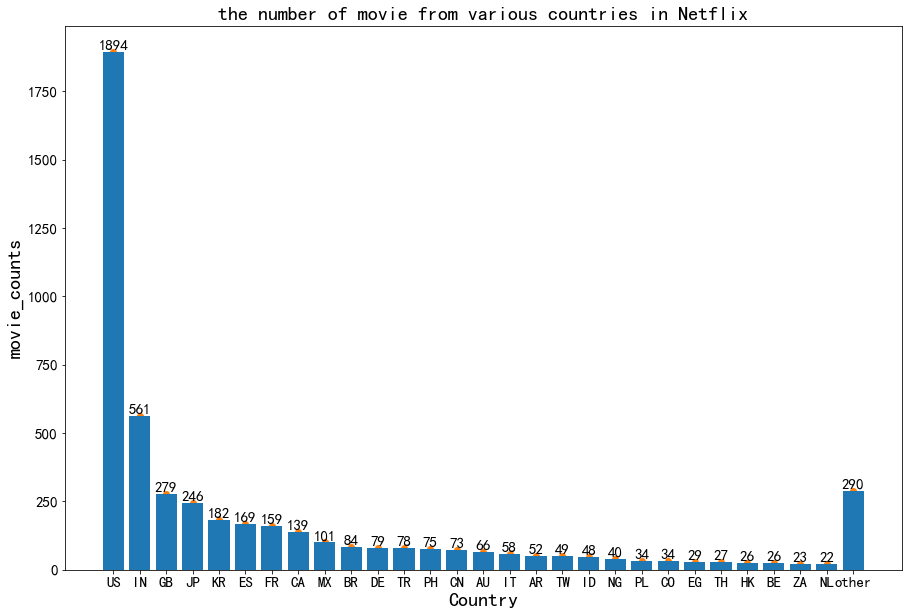

In [33]:
# 国家分类数据处理，第一种，选择第一国家
data_country_1 = data_country.copy()
data_country_1['production_countries'] = data_country_1.production_countries.map(lambda x: eval(x)[0])
country_count = data_country_1.production_countries.value_counts()
country_count_list = list(country_count.sort_values(ascending=False)[country_count.values>20])
country_count_index = list(country_count.sort_values(ascending=False)[country_count.values>20].keys())
# 统计少于20部电影的国家的总的电影数量
other_data = country_count.sum() - sum(country_count_list)
country_count_list.append(int(other_data))
country_count_index.append('other')

plt.figure(figsize=(15,10))
# sns.set_style('white')
# sns.barplot(data=country_count_list,x=country_count_index)
plt.bar(x=country_count_index, height=country_count_list)
plt.scatter(x=country_count_index, y=country_count_list)
# plt.plot(country_count_index, country_count_list)
plt.xlabel('Country',size=20)
plt.ylabel('movie_counts',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('the number of movie from various countries in Netflix',size=20)
for i,j in zip(country_count_index, country_count_list):
    plt.text(i, j, j, ha='center', va='bottom', fontsize=15)
plt.show()


In [34]:
init_option = opts.InitOpts(theme='dark',width='1000')
bar = pyecharts.charts.Bar(init_opts=init_option)
bar = bar.set_global_opts(
        xaxis_opts=opts.AxisOpts(name='国家'),
        yaxis_opts=opts.AxisOpts(name='电影数量')
)
bar = (bar
        .add_xaxis(country_count_index)
        .add_yaxis('',country_count_list)
)
bar.render_notebook()

In [8]:
# 国家分类数据处理，第二种
# 
# 

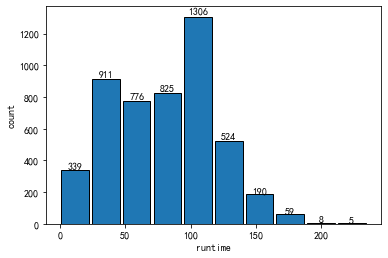

In [67]:
# 电影时长分布
# sns.displot(data_country,x='runtime',bins= 10, kde=True)

n, bins, patches = plt.hist(data_country['runtime'], bins=10, edgecolor="black", rwidth=0.9)#直方图
plt.xlabel('runtime')
plt.ylabel('count')
for i in range(len(n)):
    plt.text((bins[i]+bins[i+1])/2, n[i]*1.015, int(n[i]), horizontalalignment="center") 
# 核密度函数画图
# data_country.runtime.plot(kind='hist', bins=10, density = True)
# data_country.runtime.plot(kind='kde', color='red')

In [73]:
# data_tmp = data_country.runtime.map(lambda x: str(int(x/20)*20) + '-' +str((int(x/20)+1)*20) ).value_counts(sort=False)
data_tmp = data_country.runtime.value_counts(bins=10,sort=False)
data_tmp_x = data_tmp.keys().tolist()
data_tmp_x = [str(x) for x in data_tmp_x]
data_tmp_y = data_tmp.values.tolist()
init_option = opts.InitOpts(theme='dark',width='1000',height='600px')
axislabel_opts = opts.LabelOpts(rotate=45)
bar = pyecharts.charts.Bar(init_opts=init_option)
bar = bar.set_global_opts(
        xaxis_opts=opts.AxisOpts(name='电影时长',axislabel_opts=axislabel_opts),
        yaxis_opts=opts.AxisOpts(name='数量'),
        
)
bar = (bar
        .add_xaxis(data_tmp_x)
        .add_yaxis('',data_tmp_y)
)
bar.render_notebook()

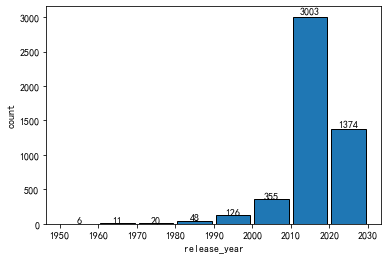

In [10]:
# 电影年份分布
# data_country['release_year'].describe()
n, bins, patches = plt.hist(data_country['release_year'], range=(1950,2030), bins=8, edgecolor="black", rwidth=0.9)#直方图
plt.xlabel('release_year')
plt.ylabel('count')
for i in range(len(n)):
    plt.text((bins[i]+bins[i+1])/2, n[i]*1.015, int(n[i]), horizontalalignment="center") 

In [74]:
data_tmp = data_country.release_year.value_counts(bins=10,sort=False)
data_tmp_x = data_tmp.keys().tolist()
data_tmp_x = [str(x) for x in data_tmp_x]
data_tmp_y = data_tmp.values.tolist()
init_option = opts.InitOpts(theme='dark',width='1000',height='600px')
axislabel_opts = opts.LabelOpts(rotate=45)
bar = pyecharts.charts.Bar(init_opts=init_option)
bar = bar.set_global_opts(
        xaxis_opts=opts.AxisOpts(name='年份',axislabel_opts=axislabel_opts),
        yaxis_opts=opts.AxisOpts(name='数量'),
        
)
bar = (bar
        .add_xaxis(data_tmp_x)
        .add_yaxis('',data_tmp_y)
)
bar.render_notebook()

<AxesSubplot:xlabel='duration', ylabel='ages'>

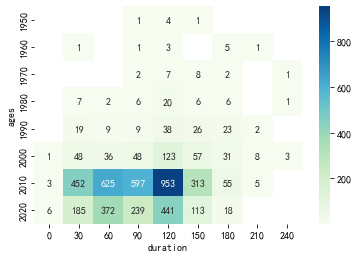

In [11]:
# 电影年份与时长
# 添加ages变量，代表所处世纪年代，1950为19世纪50年代
# 添加duration变量，代表电影时长范围
data_year = data_country.copy()
data_year['ages'] = data_year.release_year.map(lambda x: int(x/10)*10 )
data_year['duration'] = data_year.runtime.map(lambda x: int(np.ceil(x/30)*30))
data_year_1 = pd.pivot_table(data_year, index='ages', columns='duration', values='id', aggfunc='count')
sns.heatmap(data_year_1, cmap='GnBu',annot=True, fmt='.0f')
# 可以看出大部分剧集集中在20世纪10年代

<AxesSubplot:xlabel='duration', ylabel='release_year'>

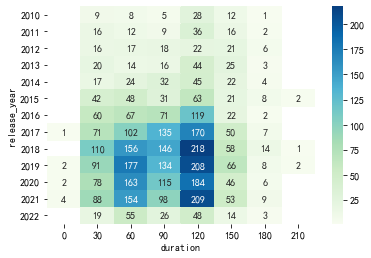

In [12]:
# 电影年份与时长,细分到10年后
data_age = data_year.copy()
data_age = data_age[data_age.ages.map(lambda x: True if (x==2010 or x==2020) else False )]
data_age_1 = pd.pivot_table(data_age, index='release_year', columns='duration', values='id', aggfunc='count')
# data_age_1 = data_age_1.fillna(0)
# data_age_1 = data_age_1.astype(int)
sns.heatmap(data_age_1, cmap='GnBu', annot=True, fmt='.0f')

# 图表来看，整体的剧集长度还是分布在60分钟和120分钟左右，当然基本上可以判断，一般是movie长度在120，show长度在60

In [13]:
# 热力图函数
def heatmap_plot(d, x, y, z, agg='mean'):
    d1 = pd.pivot_table(d, columns=x, index=y, values=z, aggfunc=agg)
    sns.heatmap(d1, cmap='GnBu', annot=True, fmt='.0f')


# 直方图函数
def hist_plot(d, index,bins):
    n, bins, patches = plt.hist(list(d[index]),bins=bins, edgecolor="black", rwidth=0.9)#直方图
    plt.xlabel(index)
    plt.ylabel('count')
    for l in range(len(n)):
        plt.text((bins[l]+bins[l+1])/2, n[l]*1.015, int(n[l]), horizontalalignment="center")

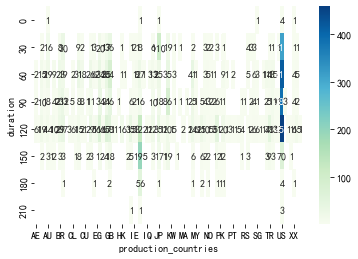

In [14]:
data_age['production_countries'] = data_age.production_countries.map(lambda x: eval(x)[0])
heatmap_plot(data_age, 'production_countries', 'duration','id', 'count')

In [15]:
# 各变量分布图
data_dis = data_country_1.copy()
data_dis['ages'] = data_dis.release_year.map(lambda x: int(x/10)*10 )
data_dis['duration'] = data_dis.runtime.map(lambda x: int(np.ceil(x/30)*30))
data_dis['imdb_score_dis'] = data_dis.imdb_score.map(lambda x: int(x)+0.5)
data_dis['tmdb_score_dis'] = data_dis.tmdb_score.map(lambda x: int(x))
index = ['type', 'ages', 'age_certification', 'duration', 'imdb_score_dis', 'tmdb_score_dis']

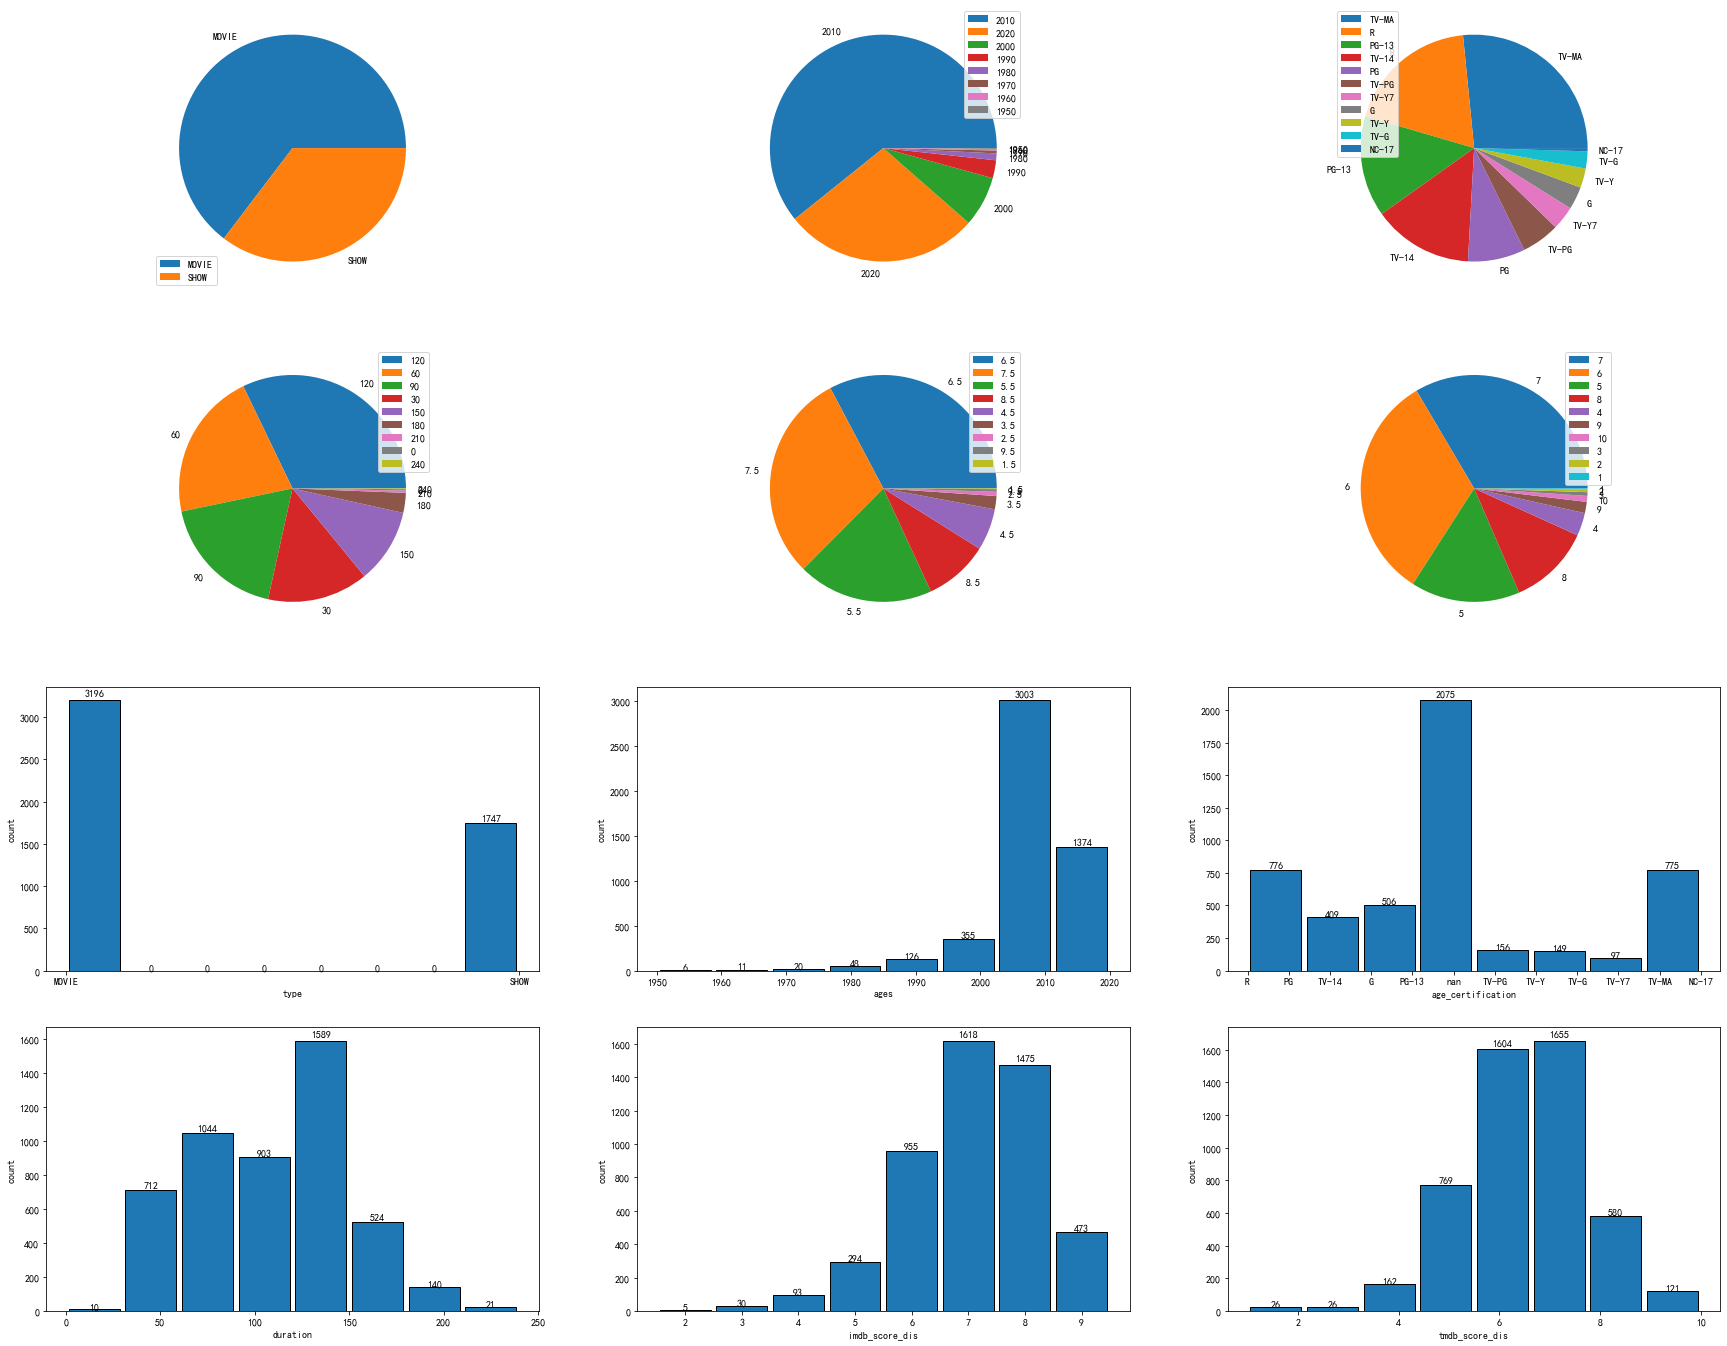

In [30]:
plt.figure(figsize=(30,24))
k = 1
for i in range(1,7):
    plt.subplot(4,3,k)
    d = data_dis[index[k-1]].value_counts()
    plt.pie(d, labels=list(data_dis[index[k-1]].value_counts().keys()))
    plt.legend()
    k += 6
    plt.subplot(4,3,k)
    k -= 6
    hist_plot(data_dis, index[k-1], 8)
    # n, bins, patches = plt.hist(list(data_dis[index[k-1]]),bins=8, edgecolor="black", rwidth=0.9)#直方图
    # plt.xlabel(index[k-1])
    # plt.ylabel('count')
    # for l in range(len(n)):
    #     plt.text((bins[l]+bins[l+1])/2, n[l]*1.015, int(n[l]), horizontalalignment="center")
    k += 1

# 可以看到imdb和tmdb的评分分布是很接近的，可以认为这两个平台的用户口味是很接近的，或者说有可能就是同一批用户。


In [46]:
# 分析2010年往后的moive数据
movie_data = data_country.copy()
movie_data['ages'] = movie_data.release_year.map(lambda x: int(x/10)*10 )
movie_data = movie_data[movie_data['ages'].map(lambda x: True if (x == 2010 or x==2020) else False)]
movie_data = movie_data[movie_data['type'] == 'MOVIE']
movie_data = movie_data.drop('seasons', axis=1)
movie_data['production_countries'] = movie_data.production_countries.map(lambda x: eval(x))
movie_data['genres'] = movie_data.genres.map(lambda x: eval(x))
movie_data['genres'] = movie_data.genres.map(lambda x: '|'.join(x))

# 分隔genres并堆叠
movie_data1 = movie_data.drop('genres', axis=1).join(movie_data['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))

In [ ]:
plt.figure(figsize=(15,20))
patches,l_text,p_text = plt.pie(movie_data1.genres.value_counts(),labels=list(movie_data1.genres.value_counts().keys()),autopct='%.02f %%')

for i in range(len(p_text)):
    if eval(p_text[i].get_text().split('%')[0]) > 5:
        p_text[i].set_size(20)
        l_text[i].set_size(20)
    else:
        p_text[i].set_size(0)
        l_text[i].set_size(10)

plt.legend(loc=0, fontsize=12)
plt.show()

In [8]:
data_tmp = movie_data1.genres.value_counts()
data_tmp_x = data_tmp.keys().tolist()
# data_tmp_x = [str(x) for x in data_tmp_x]
data_tmp_y = data_tmp.values.tolist()
init_option = opts.InitOpts(theme='dark')
label_opts = opts.LabelOpts(rotate=45)
pie = pyecharts.charts.Pie(init_opts=init_option)
pie = pie.set_global_opts(
        legend_opts=opts.LegendOpts(orient='vertical', pos_right='0%'),
        title_opts=opts.TitleOpts(title='各类型电影分布')
)
pie = (pie
        .add('', [list(z) for z in zip(data_tmp_x,data_tmp_y)], radius=['20%','80%'])
        .set_series_opts(
                label_opts=opts.LabelOpts(formatter="{b}: {d}%")
        )
)
pie.render_notebook()

In [9]:

tmdb_pop = pd.pivot_table(movie_data1, index='genres', values='tmdb_popularity', aggfunc='mean')

In [13]:
data_tmp_x = list(movie_data1.genres.unique())
data_tmp_y = [[],[],[],[],[],[]]
np.set_printoptions(precision=2)
for i in data_tmp_x:
    d = movie_data1[movie_data1['genres'] == i]['tmdb_popularity'].unique().tolist()
    data_tmp_y[0].append(np.min(d))
    data_tmp_y[1].append(np.max(d))
    data_tmp_y[2].append(np.mean(d))
    data_tmp_y[3].append(np.percentile(d,25))
    data_tmp_y[4].append(np.percentile(d,50))
    data_tmp_y[5].append(np.percentile(d,75))

data_tmp_y_1=[]
for i in data_tmp_y:
    i = [float(format(x, '.2f')) for x in i]
    data_tmp_y_1.append(i)
data_tmp_y = data_tmp_y_1

init_option = opts.InitOpts(theme='dark')
point = pyecharts.charts.Scatter(init_opts=init_option)
point = point.set_global_opts(
    title_opts=opts.TitleOpts('各类型受欢迎程度'),
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45))
)
point = (point
        .add_xaxis(data_tmp_x)
        .add_yaxis('最小值',data_tmp_y[0])
        .add_yaxis('最大值',data_tmp_y[1])
        .add_yaxis('平均值',data_tmp_y[2])
        .add_yaxis('25分位数',data_tmp_y[3])
        .add_yaxis('中间值',data_tmp_y[4])
        .add_yaxis('75分位数',data_tmp_y[5])
)
point.render_notebook()
# 类型最多的drama，comedy评分受欢迎程度反而不高。
# 类型第二梯队的thrill，romance受欢迎程度处在中等位置。
# 认为很大一部分的电影都会带上drama,comedy标签，因此导致整体平均值会被大部分的低分拉低，后续可以考虑只考虑单个带drama，comedy的标签。

In [22]:
imdb_score = pd.pivot_table(movie_data1, index='genres', values='imdb_score', aggfunc='mean')
data_tmp_x = list(movie_data1.genres.unique())
data_tmp_y = [[],[],[],[],[],[]]
np.set_printoptions(precision=2)
for i in data_tmp_x:
    d = movie_data1[movie_data1['genres'] == i]['imdb_score'].unique().tolist()
    data_tmp_y[0].append(np.min(d))
    data_tmp_y[1].append(np.max(d))
    data_tmp_y[2].append(np.mean(d))
    data_tmp_y[3].append(np.percentile(d,25))
    data_tmp_y[4].append(np.percentile(d,50))
    data_tmp_y[5].append(np.percentile(d,75))
data_tmp_y_1=[]
for i in data_tmp_y:
    i = [float(format(x, '.2f')) for x in i]
    data_tmp_y_1.append(i)
data_tmp_y = data_tmp_y_1

init_option = opts.InitOpts(theme='dark')
line = pyecharts.charts.Line(init_opts=init_option)
line = line.set_global_opts(
    title_opts=opts.TitleOpts('电影各类型得分情况'),
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45))
)
line = (line
    .add_xaxis(data_tmp_x)
    .add_yaxis('最小值',data_tmp_y[0])
    .add_yaxis('最大值',data_tmp_y[1])
    .add_yaxis('平均值',data_tmp_y[2])
    .add_yaxis('25分位值',data_tmp_y[3])
    .add_yaxis('中间值',data_tmp_y[4])
    .add_yaxis('75分位值',data_tmp_y[5])
    .set_series_opts(
        areastyle_opts=opts.AreaStyleOpts(opacity=0.3),
        label_opts=opts.LabelOpts(is_show=False)
    )
)
line.render_notebook()


In [49]:
# 选取第一种类型
movie_data2 = movie_data.copy()
movie_data2['genres'] = movie_data2.genres.map(lambda x: x.split('|')[0])
data_tmp_x = movie_data2.genres.unique().tolist()
data_tmp_y = [ movie_data2[movie_data2['genres'] == i]['imdb_score'].tolist()  for i in data_tmp_x ]      

# 类型堆叠
# data_tmp_x = movie_data1.genres.unique().tolist()
# data_tmp_y = [ movie_data1[movie_data1['genres'] == i]['imdb_score'].tolist()  for i in data_tmp_x ]      

init_option = opts.InitOpts(theme='dark')
box = pyecharts.charts.Boxplot(init_opts=init_option)
box = box.set_global_opts(
    title_opts=opts.TitleOpts('电影各类型箱型图'),
    xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=45))
)
box = (box
    .add_xaxis(data_tmp_x)
    .add_yaxis('', box.prepare_data(data_tmp_y))
)
box.render_notebook()
# 整体来看，war和history类型的得分比较集中，且整体都比较高